# Africa Education

This example uses the 'Africa Education' dataset to predict student performance. You can download the Jupyter Notebook of the study <a href="africa_education.ipynb">here</a>.
<ul class="ul_content">
    <li><b>COUNTRY</b> : COUNTRY ID</li>
    <li><b>REGION</b> : REGION ID</li>
    <li><b>SCHOOL</b> : SCHOOL ID</li>
    <li><b>PUPIL</b> : STUDENT ID</li>
    <li><b>province</b> : School Province</li>
    <li><b>schoolname</b> : School Name</li>
    <li><b>lat</b> : School Latitude</li>
    <li><b>long</b> : School Longitude</li>
    <li><b>country_long</b> : Country Name</li>
    <li><b>zralocp</b> : Student's standardized reading score</li> 
    <li><b>zmalocp</b> : Student's standardized mathematics score</li>
    <li><b>ZRALEVP</b> : Student's reading level</li>
    <li><b>ZMALEVP</b> : Student's mathematics competency level</li>
    <li><b>zraloct</b> : Teacher's standardized reading score</li> 
    <li><b>ZRALEVT</b> : Student's reading competency level Teacher</li>
    <li><b>ZMALEVT</b> : Student's mathematics competency level Teacher</li>
    <li><b>zsdist</b> :	School average distance from clinic, road, public, library, book shop & secondary school</li>
    <li><b>XNUMYRS</b> : Teacher's years of teaching</li>
    <li><b>numstu</b> : Number of students at each school</li>
    <li><b>PSEX</b> : Student's sex</li>
    <li><b>PNURSERY</b> : Student preschool</li>
    <li><b>PENGLISH</b> : Student speaks English at home</li>
    <li><b>PMALIVE</b> : Student's biological mother alive</li>
    <li><b>PFALIVE</b> : Student's biological father alive</li>
    <li><b>PTRAVEL</b> : Travels to school</li>
    <li><b>PTRAVEL2</b> : Means of transportation to school</li>
    <li><b>PMOTHER</b> : Mother's education</li>
    <li><b>PFATHER</b> : Father's education</li>
    <li><b>PLIGHT</b> : Source of lighting</li>
    <li><b>PABSENT</b> : Days absent</li>
    <li><b>PREPEAT</b> : Years repeated</li>
    <li><b>STYPE</b> : School type</li>
    <li><b>SLOCAT</b> :	School location</li>
    <li><b>SQACADEM</b> : Academic qualifications</li>
    <li><b>XSEX</b> : Teacher's sex</li>
    <li><b>XAGE</b> : Teacher's age</li>
    <li><b>XQPERMNT</b> : Teacher's employment status</li>
    <li><b>XQPROFES</b> : Teacher's training</li>
    <li><b>zpsibs</b> : Student's number of siblings</li>
    <li><b>zpsit</b> : Seating location</li>
    <li><b>zpmealsc</b> : Free school meals</li>
    <li><b>zphmwkhl</b> : Homework help</li>
    <li><b>zpses</b> : Student's socioeconomic status</li>
    <li><b>PAGE</b> : Student's Age</li>
    <li><b>SINS2006</b> : School inspection</li>
    <li><b>SPUPPR04</b> : Student dropout</li>
    <li><b>SPUPPR06</b> : Student cheats</li>
    <li><b>SPUPPR07</b> : Student uses abusive language</li>
    <li><b>SPUPPR08</b> : Student vandalism</li>
    <li><b>SPUPPR09</b> : Student theft</li>
    <li><b>SPUPPR10</b> : Student bullies students</li>
    <li><b>SPUPPR11</b> : Student bullies staff</li>
    <li><b>SPUPPR12</b> : Student injures staff</li>
    <li><b>SPUPPR13</b> : Student sexually harrasses students</li>
    <li><b>SPUPPR14</b> : Student sexually harrasses teachers</li>
    <li><b>SPUPPR15</b> : Student drug abuse</li>
    <li><b>SPUPPR16</b> : Student alcohol abuse</li>
    <li><b>SPUPPR17</b> : Student fights</li>
    <li><b>STCHPR04</b> : Teacher bullies students</li>
    <li><b>STCHPR05</b> : Teacher sexually harasses teachers</li>
    <li><b>STCHPR06</b> : Teacher sexually harasses students</li>
    <li><b>STCHPR07</b> : Teacher uses abusive language</li>
    <li><b>STCHPR08</b> : Teacher drug abuse</li>
    <li><b>STCHPR09</b> : Teacher alcohol abuse</li>
</ul>

We will follow the data science cycle (Data Exploration - Data Preparation - Data Modeling - Model Evaluation - Model Deployment) to solve this problem.

## Initialization

This example uses the following version of VerticaPy:

In [1]:
import verticapy as vp
vp.__version__

'1.1.0'

Connect to Vertica. This example uses an existing connection called "VerticaDSN." For details on how to create a connection, use see the <a href="https://www.vertica.com/python/documentation/1.1.x/html/connection.html">connection tutorial</a>.

You can skip the below cell if you already have an established connection.

In [2]:
vp.connect("VerticaDSN")

Connected Successfully!


Let's create a Virtual DataFrame of the dataset. The dataset is available <a href="../../data/africa_education.csv">here</a>.

In [7]:
from verticapy.datasets import load_africa_education

africa = load_africa_education()

## Data Exploration and Preparation

Let's look at the links between all the variables. Remember our goal: find a way to predict students' final scores ('zralocp' & 'zmalocp').

In [8]:
africa.corr()

Some variables are useless because they are categorizations of others. For example, most scores can go from 0 to 1000, and some variables are created by mapping these variables to a reduced interval (for example: 0 to 10), so we can drop them.

,123PABSENTInteger,AbcSPUPPR16Varchar(20),AbczpmealscVarchar(32),AbcPREPEATVarchar(20),123zpsesNumeric(9),AbcSPUPPR06Varchar(20),123zraloctFloat(22),AbcXSEXVarchar(20),🌎lonNumeric(13),123zralocpFloat(22),AbcdistrictVarchar(46),AbcSPUPPR13Varchar(20),AbcSPUPPR09Varchar(20),AbcSPUPPR10Varchar(20),AbczpsitVarchar(54),AbcPNURSERYVarchar(38),AbcSTCHPR08Varchar(20),Abccountry_longVarchar(24),AbcXQPROFESVarchar(20),AbcPTRAVEL2Varchar(20),AbcPTRAVELVarchar(20),🌎latNumeric(13),AbcPLIGHTVarchar(20),AbcREGIONVarchar(10),AbcSUPPR17Varchar(20),...,AbcSTCHPR06Varchar(20),123XNUMYRSNumeric(5),AbcPFATHERVarchar(10),123zsdistNumeric(11),AbcPSEXVarchar(10),AbcSLOCATVarchar(20),AbcprovinceVarchar(60),AbczphmwkhlVarchar(56),AbcSPUPPR04Varchar(20),AbcSPUPPR11Varchar(20),AbcSTCHPR07Varchar(20),AbcSQACADEMVarchar(22),AbcSTCHPR04Varchar(20),123SINS2006Numeric(11),123numstuInteger,010PFALIVEBoolean,AbcSTCHPR09Varchar(20),AbcSPUPPR15Varchar(20),AbcPENGLISHVarchar(32),AbcSPUPPR12Varchar(20),123zpsibsInteger,123XAGENumeric(11),AbcSPUPPR08Varchar(20),123PAGEInteger,AbcschoolnameVarchar(16)
1,0,NEVER,No,NEVER,[null],NEVER,[null],FEMALE,35.740688,433.300602,Marromeu,NEVER,SOMETIMES,SOMETIMES,I have my own sitting place,NEVER,NEVER,Mozambique,2 YRS TT,WALK,UP TO 0.5KM,-12.764099,GAS,SOF,SOMETIMES,...,NEVER,10.0,Completed,7.4,BOY,SMALLTOWN,Sofala,Most of time/Always corrects,SOMETIMES,SOMETIMES,SOMETIMES,TERTIARY ED,NEVER,1.0,16,✅,SOMETIMES,NEVER,ALL THE TIME,NEVER,0,34.0,NEVER,11,Escola PrimÃ¡r
2,0,NEVER,No,NEVER,1.0,NEVER,696.4474041,MALE,35.319187,524.2908337,Inhassoro,NEVER,SOMETIMES,SOMETIMES,I have my own sitting place,NEVER,NEVER,Mozambique,<1 YR TT,WALK,>0.5-1KM,-21.999731,CANDLE,INH,SOMETIMES,...,NEVER,5.0,I Do Not K,19.0,BOY,SMALLTOWN,Inhambane,No homework/Never/Sometimes,OFTEN,NEVER,NEVER,A-LEVEL,NEVER,3.0,21,❌,NEVER,NEVER,SOMETIMES,NEVER,4,27.0,NEVER,13,Escola PrimÃ¡r

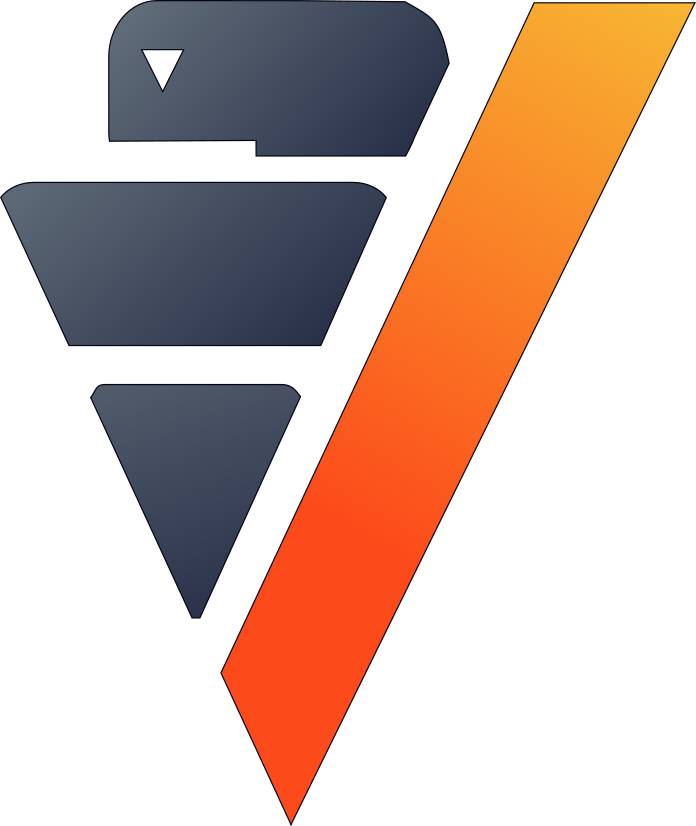

In [9]:
africa.drop(
    [
        "ZMALEVT", 
        "ZRALEVT", 
        "ZRALEVP", 
        "ZMALEVP",
        "COUNTRY",
        "SCHOOL",
        "PUPIL",
    ],
).head(2)

Let's take a look at the missing values.

  0%|          | 0/3 [00:00<?, ?it/s]

,count,percent
"""PABSENT""",19290.0,100.0
"""zpmealsc""",19290.0,100.0
"""PREPEAT""",19290.0,100.0
"""lon""",19290.0,100.0
"""zralocp""",19290.0,100.0
"""district""",19290.0,100.0
"""zpsit""",19290.0,100.0
"""PNURSERY""",19290.0,100.0
"""country_long""",19290.0,100.0
"""PTRAVEL2""",19290.0,100.0

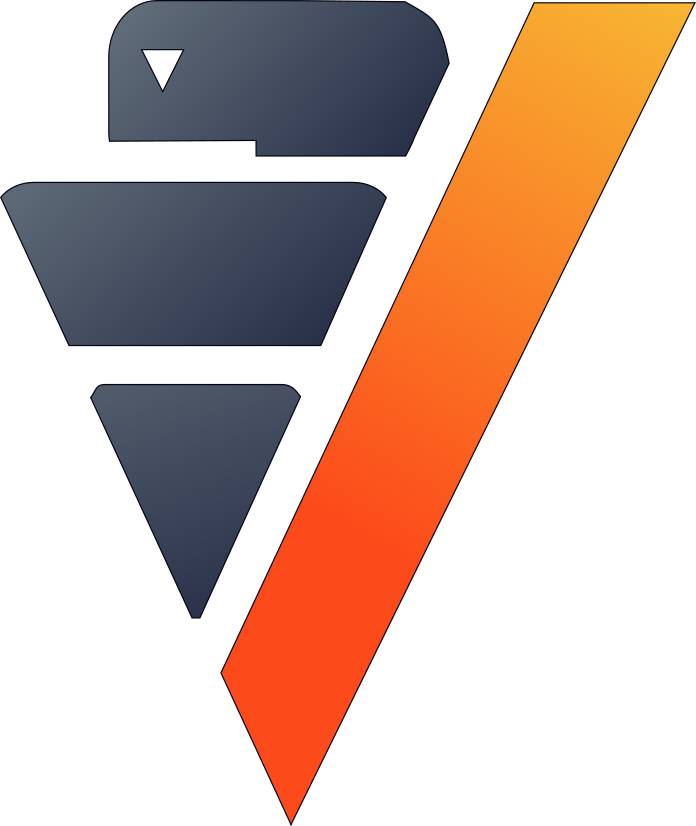

In [10]:
africa.count_percent()

Many values are missing for 'zraloct' which is the teachers' test score. We need to find a way to impute them as they represent more than 10% of the dataset. For the others that represent less than 5% of the dataset, our goal is to identify what improves student performance, so we can filter them.

We'll use two variables to impute the teachers' scores: TEACHER'S SEX (XSEX) and Teacher's Training (XQPROFES).

2019 elements were filled.
Nothing was filtered.


,123PABSENTInteger,AbcSPUPPR16Varchar(20),AbczpmealscVarchar(32),AbcPREPEATVarchar(20),123zpsesNumeric(9),AbcSPUPPR06Varchar(20),123zraloctFloat(22),AbcXSEXVarchar(20),🌎lonNumeric(13),123zralocpFloat(22),AbcdistrictVarchar(46),AbcSPUPPR13Varchar(20),AbcSPUPPR09Varchar(20),AbcSPUPPR10Varchar(20),AbczpsitVarchar(54),AbcPNURSERYVarchar(38),AbcSTCHPR08Varchar(20),Abccountry_longVarchar(24),AbcXQPROFESVarchar(20),AbcPTRAVEL2Varchar(20),AbcPTRAVELVarchar(20),🌎latNumeric(13),AbcPLIGHTVarchar(20),AbcREGIONVarchar(10),AbcSUPPR17Varchar(20),...,AbcSTCHPR06Varchar(20),123XNUMYRSNumeric(5),AbcPFATHERVarchar(10),123zsdistNumeric(11),AbcPSEXVarchar(10),AbcSLOCATVarchar(20),AbcprovinceVarchar(60),AbczphmwkhlVarchar(56),AbcSPUPPR04Varchar(20),AbcSPUPPR11Varchar(20),AbcSTCHPR07Varchar(20),AbcSQACADEMVarchar(22),AbcSTCHPR04Varchar(20),123SINS2006Numeric(11),123numstuInteger,010PFALIVEBoolean,AbcSTCHPR09Varchar(20),AbcSPUPPR15Varchar(20),AbcPENGLISHVarchar(32),AbcSPUPPR12Varchar(20),123zpsibsInteger,123XAGENumeric(11),AbcSPUPPR08Varchar(20),123PAGEInteger,AbcschoolnameVarchar(16)
1,26,NEVER,One per day,ONCE,6.0,SOMETIMES,781.8103573,MALE,31.85626,473.1684394,GURUVE,SOMETIMES,SOMETIMES,OFTEN,I have my own sitting place,ONE YEAR,NEVER,Zimbabwe,3 YRS TT,WALK,>0.5-1KM,-16.925705,GAS,MAC,OFTEN,...,NEVER,2.0,Completed,49.8,GIRL,RURAL,MASH CENTRAL,No homework/Never/Sometimes,SOMETIMES,NEVER,SOMETIMES,TERTIARY ED,SOMETIMES,3.0,25,❌,NEVER,NEVER,SOMETIMES,NEVER,3,27.0,NEVER,13,MAHUWE
2,23,SOMETIMES,No,ONCE,1.0,SOMETIMES,884.6274115,MALE,34.950661,533.542461,BUSIA,SOMETIMES,SOMETIMES,SOMETIMES,I have my own sitting place,TWO YEARS,SOMETIMES,Kenya,3 YRS TT,WALK,>2-2.5KM,1.0566667,PARAFFIN/OIL,WES,OFTEN,...,NEVER,34.0,Completed,34.6,GIRL,SMALLTOWN,WESTERN,No homework/Never/Sometimes,OFTEN,NEVER,NEVER,SENIOR SEC,NEVER,14.0,24,❌,NEVER,SOMETIMES,SOMETIMES,NEVER,5,52.0,SOMETIMES,13,SIFUGWE PRI SCH
3,16,NEVER,No,ONCE,2.0,SOMETIMES,721.8178461,MALE,32.91745,563.5864054,MOROGORO,NEVER,SOMETIMES,SOMETIMES,I have my own sitting place,NEVER,NEVER,Tanzania,3 YRS TT,WALK,>1.5-2KM,-2.5164306,PARAFFIN/OIL,NOE,NEVER,...,NEVER,27.0,Completed,55.2,BOY,RURAL,NORTHEAST,No homework/Never/Sometimes,SOMETIMES,NEVER,NEVER,SENIOR SEC,NEVER,0.0,16,✅,SOMETIMES,NEVER,SOMETIMES,NEVER,3,47.0,SOMETIMES,16,MLONO
4,15,SOMETIMES,One per day,ONCE,2.0,NEVER,735.456843,MALE,33.290966,443.6967606,Milange,NEVER,SOMETIMES,NEVER,No place/share,THREE OR MORE YEARS,NEVER,Mozambique,3 YRS TT,WALK,>4KM-4.5KM,-15.561879,PARAFFIN/OIL,ZAM,NEVER,...,NEVER,3.0,"No School,",32.8,BOY,RURAL,ZambÃ©zia,No homework/Never/Sometimes,SOMETIMES,NEVER,SOMETIMES,SENIOR SEC,NEVER,2.0,13,✅,SOMETIMES,NEVER,ALL THE TIME,NEVER,16,30.0,NEVER,15,Escola PrimÃ¡r
5,15,OFTEN,No,NEVER,4.0,SOMETIMES,696.5427817,MALE,33.460773,434.1590004,SHINYANGA,NEVER,OFTEN,SOMETIMES,I have my own sitting place,NEVER,OFTEN,Tanzania,3 YRS TT,WALK,>2-2.5KM,-8.9094009,PARAFFIN/OIL,WES,SOMETIMES,...,OFTEN,26.0,Completed,38.4,GIRL,RURAL,WESTERN,No homework/Never/Sometimes,SOMETIMES,OFTEN,OFTEN,SENIOR SEC,SOMETIMES,1.0,13,✅,OFTEN,OFTEN,SOMETIMES,NEVER,5,51.0,SOMETIMES,15,LAGANA
6,15,NEVER,No,NEVER,5.0,SOMETIMES,846.0948606,MALE,34.657997,551.0919397,Kapchorwa,NEVER,SOMETIMES,SOMETIMES,I have my own sitting place,NEVER,NEVER,Uganda,3 YRS TT,WALK,UP TO 0.5KM,2.5282235,ELECTRIC,EAS,SOMETIMES,...,NEVER,12.0,Completed,2.8,BOY,LARGE CITY,Eastern,No homework/Never/Sometimes,SOMETIMES,SOMETIMES,SOMETIMES,SENIOR SEC,SOMETIMES,15.0,25,✅,SOMETIMES,NEVER,SOMETIMES,NEVER,5,42.0,SOMETIMES,14,Madera Boys Pri
7,13,SOMETIMES,One per day,TWICE,3.0,SOMETIMES,740.6072335,MALE,31.439903,354.7094585,CHIPINGE,SOMETIMES,SOMETIMES,SOMETIMES,I have my own sitting place,NEVER,SOMETIMES,Zimbabwe,3 YRS TT,WALK,UP TO 0.5KM,-19.321138,CANDLE,MNC,SOMETIMES,...,SOMETIMES,7.0,"No School,",45.0,BOY,RURAL,MANICALAND,Most of time/Always corrects,SOMETIMES,SOMETIMES,SOMETIMES,SENIOR SEC,SOMETIMES,0.0,23,❌,SOMETIMES,SOMETIMES,NEVER,NEVER,1,40.0,SOMETIMES,12,MANZVIRE
8,13,SOMETIMES,One per 
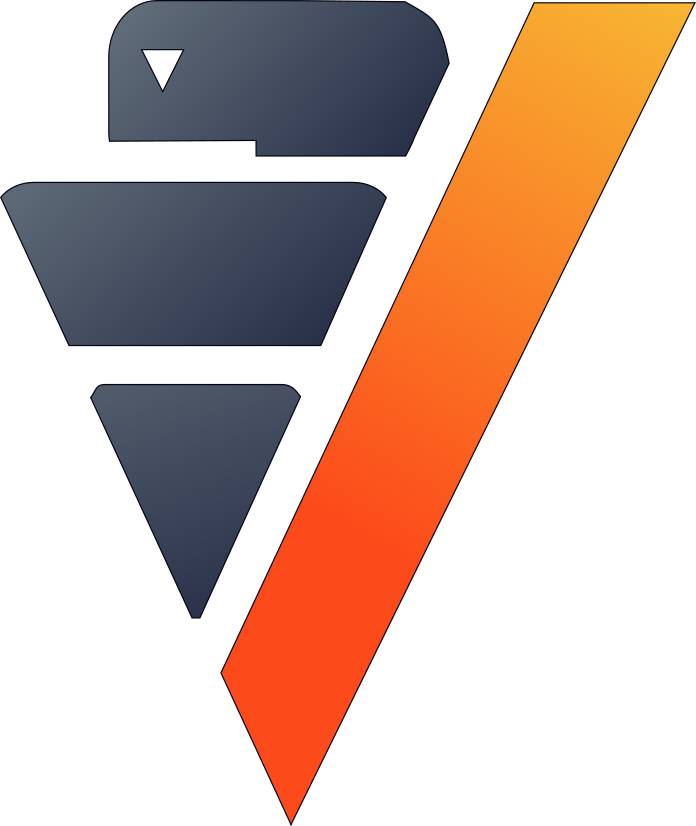

In [11]:
africa["zraloct"].fillna(
    method = "avg", 
    by = ["XSEX", "XQPROFES"],
)
africa.dropna()

Now that we have a clean dataset, we can use a Random Forest Regressor to understand what tends to influence the a student's final score.

## Machine Learning: Finding Clusters using lat/long

Let's try to find some clusters between schools.

Since we have the school's location, a natural approach might be to find school clusters based on proximity. These clusters can be used as inputs by our model.

In [12]:
from verticapy.machine_learning.model_selection import elbow

elbow(
    africa,
    X = ["lon", "lat"],
    n_cluster = (1, 30),
    show = True,
)

  0%|          | 0/29 [00:00<?, ?it/s]

Eight seems to be a suitable number of clusters. Let's compute a k-means model.

In [13]:
from verticapy.machine_learning.vertica import KMeans

model = KMeans(n_cluster = 8)
model.fit(africa, X = ["lon", "lat"])



centers
  lon   |   lat   
--------+---------
29.06136|-26.67563
20.58419|-30.52938
17.56219|-19.37041
32.47330|-15.87166
32.36941| 0.32791 
57.17161|-15.28719
38.14541|-6.89761 
36.61916|-0.76676 


metrics
Evaluation metrics:
     Total Sum of Squares: 3786806.5
     Within-Cluster Sum of Squares: 
         Cluster 0: 79511.049
         Cluster 1: 11557.431
         Cluster 2: 24113.716
         Cluster 3: 43983.943
         Cluster 4: 9651.1532
         Cluster 5: 91475.146
         Cluster 6: 19894.916
         Cluster 7: 6380.7875
     Total Within-Cluster Sum of Squares: 286568.14
     Between-Cluster Sum of Squares: 3500238.3
     Between-Cluster SS / Total SS: 92.43%
 Number of iterations performed: 14
 Converged: True
 Call:
kmeans('"public"."_verticapy_tmp_kmeans_v_mldb_f937005e87a711ef980b8264e8a23743_"', '"public"."_verticapy_tmp_view_v_mldb_f9c39d7087a711ef980b8264e8a23743_"', '"lon", "lat"', 8
USING PARAMETERS max_iterations=300, epsilon=0.0001, init_method='kmeanspp', 

We can add the prediction to the vDataFrame and draw the scatter map.

<AxesSubplot:xlabel='lon', ylabel='lat'>

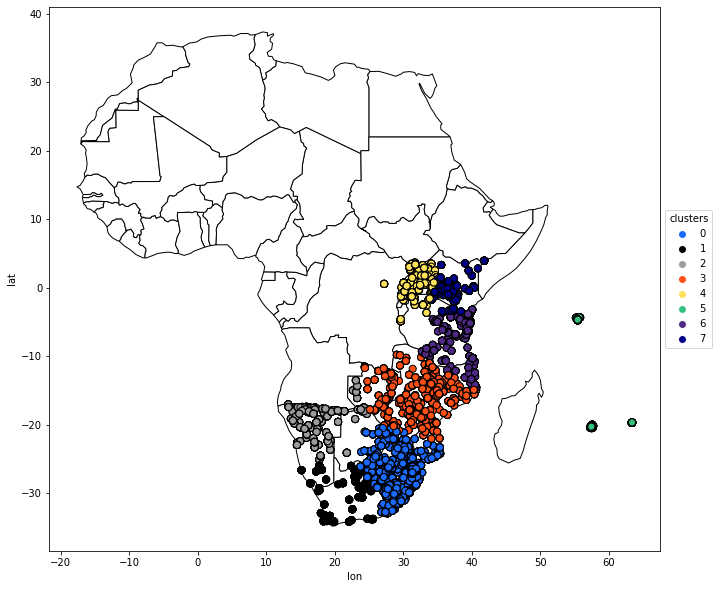

In [23]:
# Change the plotting lib to matplotlib
vp.set_option("plotting_lib", "matplotlib")

# Adding the prediction to the vDataFrame
model.predict(africa, name = "clusters")

# Importing the World Data
from verticapy.datasets import load_world

africa_world = load_world()

# Filtering and drawing Africa
africa_world = africa_world[africa_world["continent"] == "Africa"]
ax = africa_world["geometry"].geo_plot(color = "white", edgecolor='black',)

# displaying the clusters
africa.scatter(
    ["lon", "lat"],
    by = "clusters",
    ax = ax,
)

## Machine Learning: Understanding the Students' Final Scores

A student's math score is strongly correlated their reading score, so we can use just one of the variables for our predictions. Let's use a cross validation to see if our variables have enough information to predict the students' scores.

  0%|          | 0/3 [00:00<?, ?it/s]

,explained_variance,max_error,median_absolute_error,mean_absolute_error,mean_squared_error,root_mean_squared_error,r2,r2_adj,aic,bic,time
1-fold,0.507355484478693,380.499940781088,45.425232524837,55.5798039800325,5105.85037835534,71.0664882624358,0.507347798312796,0.503071017930871,51703.8876895769,52057.4466446544,74.09776902198792
2-fold,0.505725209650531,403.705543298364,46.6133204154712,56.6413074391586,5111.41303778623,72.2816011739304,0.505670264958028,0.501373182674146,51642.1564433238,51995.6426549961,74.63875913619995
3-fold,0.51549721895526,393.828144700083,44.5636906558915,54.92129445297,4975.57885451584,70.5866650257016,0.515449822983004,0.511236343182857,51462.5847465336,51816.052756753,76.00231599807739
avg,0.5095259710281613,392.67787625984494,45.534081198733226,55.71413529072037,5064.280756885803,71.31158482068928,0.5094892954179426,0.5052268479292913,51602.87629314477,51956.38068546783,74.91294805208842
std,0.004274443461551038,9.508499186198518,0.8402902527085161,0.7085877240152633,62.76281493593625,0.7133285258999694,0.004270007508149669,0.004305514761459327,102.35225198273336,102.38450067423176,0.801336162181625

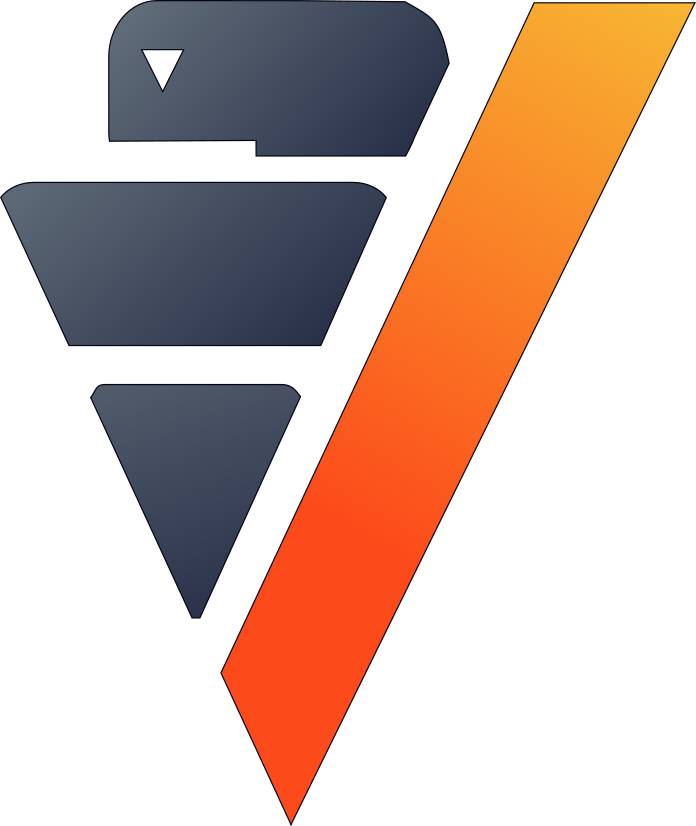

In [24]:
from verticapy.machine_learning.vertica import RandomForestRegressor
from verticapy.machine_learning.model_selection import cross_validate

predictors = africa.get_columns(
    exclude_columns = [
        "zralocp", 
        "zmalocp",
        "lat", 
        "lon",
        "schoolname",
    ],
)
response = "zralocp"
model = RandomForestRegressor(
    n_estimators = 40,
    max_depth = 20,
    min_samples_leaf = 4,
    nbins = 20,
    sample = 0.7,
)
cross_validate(
    model,
    africa,
    X = predictors,
    y = response,
)

These scores are quite good! Let's fit all the data and keep the most important variables.

In [25]:
model.fit(
    africa, 
    X = predictors, 
    y = response,
)
predictors = model.features_importance(show=False)["index"]



call_string
SELECT rf_regressor('"public"."_verticapy_tmp_randomforestregressor_v_mldb_79b9266287a811ef980b8264e8a23743_"', '"public"."_verticapy_tmp_view_v_mldb_0dcfe0b687a911ef980b8264e8a23743_"', 'zralocp', '"PABSENT", "SPUPPR16", "zpmealsc", "PREPEAT", "zpses", "SPUPPR06", "zraloct", "XSEX", "district", "SPUPPR13", "SPUPPR09", "SPUPPR10", "zpsit", "PNURSERY", "STCHPR08", "country_long", "XQPROFES", "PTRAVEL2", "PTRAVEL", "PLIGHT", "REGION", "SUPPR17", "PMOTHER", "STYPE", "SPUPPR07", "SPUPPR14", "PMALIVE", "STCHPR06", "XNUMYRS", "PFATHER", "zsdist", "PSEX", "SLOCAT", "province", "zphmwkhl", "SPUPPR04", "SPUPPR11", "STCHPR07", "SQACADEM", "STCHPR04", "SINS2006", "numstu", "PFALIVE", "STCHPR09", "SPUPPR15", "PENGLISH", "SPUPPR12", "zpsibs", "XAGE", "SPUPPR08", "PAGE", "clusters"' USING PARAMETERS exclude_columns='', ntree=40, mtry=18, sampling_size=0.7, max_depth=20, max_breadth=1000000000, min_leaf_size=4, min_info_gain=0, nbins=20);

details
 predictor  |      type      
---------

We can see here that socioeconomic status and a student's country tend to strongly influence the students work quality. This makes sense: you would expect that having poor studying conditions (unstable government, difficulties at home, etc.) would lead to worse results. For now, let's just consider the 20 most important variables.

Let's do some tuning to find the best parameters for the use case. Our goal will be to optimize the 'median_absolute_error'.

In [26]:
predictors

['zpses',
 'country_long',
 'clusters',
 'plight',
 'penglish',
 'slocat',
 'prepeat',
 'spuppr04',
 'page',
 'ptravel2',
 'region',
 'district',
 'province',
 'zsdist',
 'pnursery',
 'zraloct',
 'xage',
 'pabsent',
 'xnumyrs',
 'zpsibs',
 'zpmealsc',
 'pmother',
 'ptravel',
 'numstu',
 'sqacadem',
 'xqprofes',
 'pfather',
 'psex',
 'sins2006',
 'spuppr08',
 'stype',
 'spuppr10',
 'spuppr07',
 'spuppr09',
 'suppr17',
 'spuppr06',
 'spuppr13',
 'stchpr09',
 'stchpr07',
 'stchpr04',
 'spuppr16',
 'spuppr11',
 'zphmwkhl',
 'spuppr15',
 'stchpr08',
 'stchpr06',
 'xsex',
 'zpsit',
 'pfalive',
 'spuppr14',
 'spuppr12',
 'pmalive']

  0%|          | 0/4 [00:00<?, ?it/s]

Model: RandomForestRegressor; Parameters: {'min_samples_leaf': 1, 'max_leaf_nodes': 100, 'max_depth': 5}; Test_score: 52.79241040482287; Train_score: 53.18723625171567; Time: 39.38479495048523;
Model: RandomForestRegressor; Parameters: {'min_samples_leaf': 1, 'max_leaf_nodes': 100, 'max_depth': 10}; Test_score: 49.7082832949143; Train_score: 48.19321130302333; Time: 45.890698273976646;
Model: RandomForestRegressor; Parameters: {'min_samples_leaf': 3, 'max_leaf_nodes': 100, 'max_depth': 5}; Test_score: 53.274709409633395; Train_score: 53.224504410911635; Time: 41.46711174647013;
Model: RandomForestRegressor; Parameters: {'min_samples_leaf': 3, 'max_leaf_nodes': 100, 'max_depth': 10}; Test_score: 47.89784692401397; Train_score: 48.164022228747704; Time: 43.27339696884155;
Grid Search Selected Model
RandomForestRegressor; Parameters: {'n_estimators': 40, 'max_features': 'auto', 'max_leaf_nodes': 100, 'sample': 0.7, 'max_depth': 10, 'min_samples_leaf': 3, 'min_info_gain': 0.0, 'nbins': 20}

,,avg_score,avg_train_score,avg_time,score_std,score_train_std
1,,47.89784692401397,48.164022228747704,43.27339696884155,1.1364628034111042,0.6332761486770796
2,,49.7082832949143,48.19321130302333,45.890698273976646,0.5457542042440168,0.4063806953272433
3,,52.79241040482287,53.18723625171567,39.38479495048523,0.4941471245303363,0.09620579142263719
4,,53.274709409633395,53.224504410911635,41.46711174647013,0.8143497641698181,0.5055476257381611

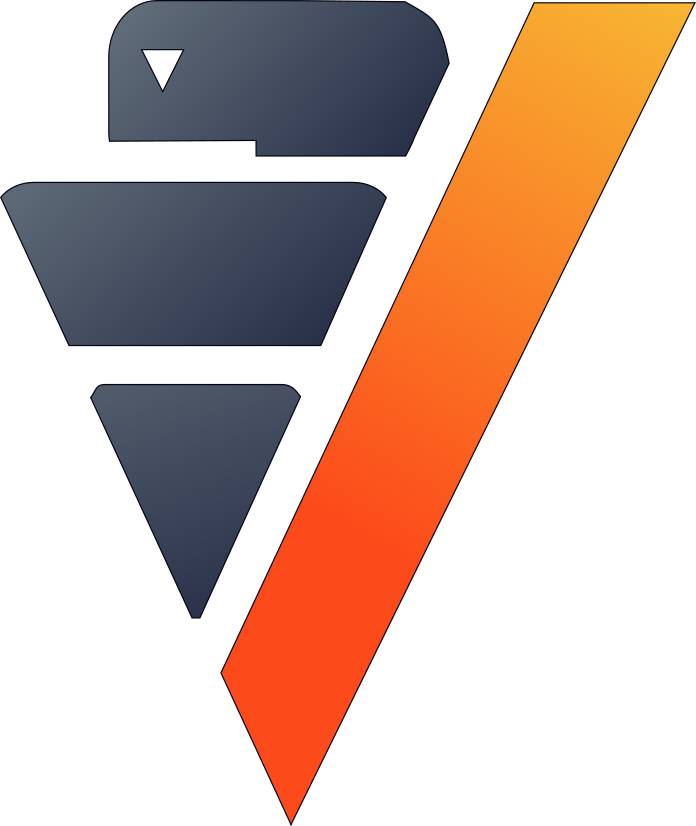

In [27]:
from verticapy.machine_learning.model_selection import grid_search_cv

gcv = grid_search_cv(
    model,
    {
        "min_samples_leaf": [1, 3],
        "max_leaf_nodes": [100],
        "max_depth": [5, 10]
    },
    metric = "median",
    input_relation = africa,
    X = predictors[:20], 
    y = response,
)
gcv

Our model is excellent. Let's create one for the students' standardized reading score (zralocp).



call_string
SELECT rf_regressor('"public"."_verticapy_tmp_randomforestregressor_v_mldb_a40c322c87aa11ef980b8264e8a23743_"', '"public"."_verticapy_tmp_view_v_mldb_a4b8377a87aa11ef980b8264e8a23743_"', 'zralocp', '"zpses", "country_long", "clusters", "plight", "penglish", "slocat", "prepeat", "spuppr04", "page", "ptravel2", "region", "district", "province", "zsdist", "pnursery", "zraloct", "xage", "pabsent", "xnumyrs", "zpsibs"' USING PARAMETERS exclude_columns='', ntree=40, mtry=7, sampling_size=0.7, max_depth=10, max_breadth=100, min_leaf_size=3, min_info_gain=0, nbins=20);

details
 predictor  |      type      
------------+----------------
   zpses    |float or numeric
country_long|char or varchar 
  clusters  |      int       
   plight   |char or varchar 
  penglish  |char or varchar 
   slocat   |char or varchar 
  prepeat   |char or varchar 
  spuppr04  |char or varchar 
    page    |      int       
  ptravel2  |char or varchar 
   region   |char or varchar 
  district  |char o

,value
explained_variance,0.474416657014161
max_error,386.565083272089
median_absolute_error,48.3188301528445
mean_absolute_error,58.0664914898323
mean_squared_error,5436.29627518502
root_mean_squared_error,73.7312435483427
r2,0.474416351626803
r2_adj,0.473834889464647
aic,155708.943352107
bic,155872.719297458

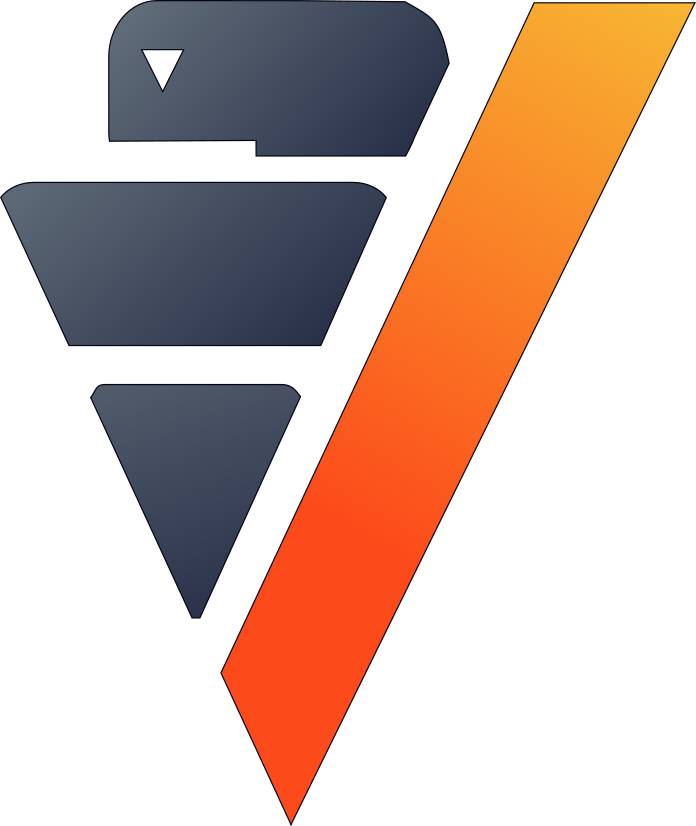

In [28]:
response = "zralocp"
model_africa_rf_zralocp = RandomForestRegressor(**gcv["parameters"][0])
model_africa_rf_zralocp.fit(
    africa,
    predictors[0:20], 
    response
)
model_africa_rf_zralocp.regression_report()

We'll also create one for the students' standardized mathematics score (zmalocp).



call_string
SELECT rf_regressor('"public"."_verticapy_tmp_randomforestregressor_v_mldb_c2b9218087aa11ef980b8264e8a23743_"', '"public"."_verticapy_tmp_view_v_mldb_c36cc1c287aa11ef980b8264e8a23743_"', 'zmalocp', '"zpses", "country_long", "clusters", "plight", "penglish", "slocat", "prepeat", "spuppr04", "page", "ptravel2", "region", "district", "province", "zsdist", "pnursery", "zraloct", "xage", "pabsent", "xnumyrs", "zpsibs"' USING PARAMETERS exclude_columns='', ntree=40, mtry=7, sampling_size=0.7, max_depth=10, max_breadth=100, min_leaf_size=3, min_info_gain=0, nbins=20);

details
 predictor  |      type      
------------+----------------
   zpses    |float or numeric
country_long|char or varchar 
  clusters  |      int       
   plight   |char or varchar 
  penglish  |char or varchar 
   slocat   |char or varchar 
  prepeat   |char or varchar 
  spuppr04  |char or varchar 
    page    |      int       
  ptravel2  |char or varchar 
   region   |char or varchar 
  district  |char o

,value
explained_variance,0.441899625804808
max_error,515.978497212976
median_absolute_error,44.6567841124129
mean_absolute_error,55.5045338006688
mean_squared_error,5186.76524297803
root_mean_squared_error,72.0192005160987
r2,0.441899618623333
r2_adj,0.441282182644379
aic,154858.511854689
bic,155022.287800041

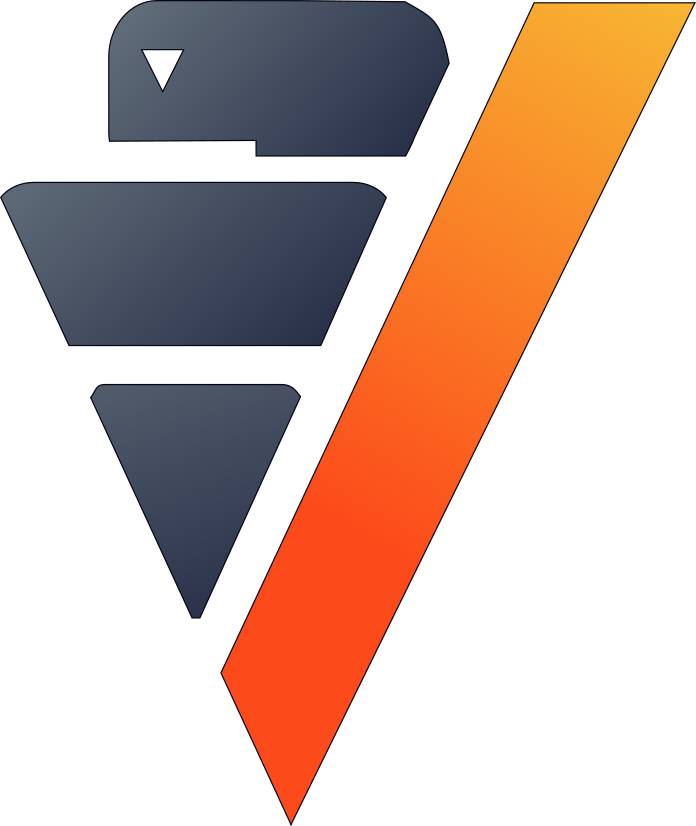

In [29]:
response = "zmalocp"
model_africa_rf_zmalocp = RandomForestRegressor(**gcv["parameters"][0])
model_africa_rf_zmalocp.drop()
model_africa_rf_zmalocp.fit(
    africa,
    predictors[0:20], 
    response,
)
model_africa_rf_zmalocp.regression_report()

Let's look at the feature importance for each model.

In [30]:
# Setting back to 'Plotly'
vp.set_option("plotting_lib", "plotly")

model_africa_rf_zralocp.features_importance()

In [31]:
model_africa_rf_zmalocp.features_importance()

Feature importance between between math score and the reading score are almost identical.

We can add these predictions to the main vDataFrame.

,123zpsesNumeric(9),Abccountry_longVarchar(24),123clustersInteger,AbcPLIGHTVarchar(20),AbcPENGLISHVarchar(32),AbcSLOCATVarchar(20),AbcPREPEATVarchar(20),AbcSPUPPR04Varchar(20),123PAGEInteger,AbcPTRAVEL2Varchar(20),AbcREGIONVarchar(10),AbcdistrictVarchar(46),AbcprovinceVarchar(60),123zsdistNumeric(11),AbcPNURSERYVarchar(38),123zraloctFloat(22),123XAGENumeric(11),123PABSENTInteger,123XNUMYRSNumeric(5),123zpsibsInteger,AbczpmealscVarchar(32),AbcVarchar(80),AbcPTRAVELVarchar(20),123zralocpFloat(22),123zmalocpNumeric(13),123pred_zralocpFloat(22),123pred_zmalocpFloat(22)
1,1.0,Mozambique,3,FIRE,NEVER,ISOLATED,NEVER,SOMETIMES,12,WALK,TET,Zumbo,Tete,5.0,NEVER,749.09584,42.0,8,5.0,0,No,,>1.5-2KM,389.1407726,507.6622407,455.984043979556,460.260219099631
2,1.0,Uganda,4,NO LIGHTING,ALL THE TIME,RURAL,NEVER,OFTEN,16,WALK,NOR,Rakai,Central,35.4,TWO YEARS,624.6280703,25.0,7,3.0,8,No,,UP TO 0.5KM,408.8839361,390.5312715,463.137600763342,471.337345965456
3,6.0,Lesotho,0,CANDLE,ALL THE TIME,RURAL,TWICE,SOMETIMES,13,WALK,MOH,MOHALE'S HOEK,MOHALE'S HOEK,27.0,ONE YEAR,753.8647201,28.0,5,9.0,3,One per day,,>0.5-1KM,507.5997535,439.3639715,455.251415002178,468.90287282946
4,1.0,Mozambique,3,PARAFFIN/OIL,MOST OF THE TIME,ISOLATED,ONCE,SOMETIMES,14,WALK,TET,Zumbo,Tete,5.0,NEVER,749.09584,42.0,4,5.0,4,No,,UP TO 0.5KM,443.6967606,533.7663568,460.342231971739,470.183868182369
5,4.0,Mozambique,3,PARAFFIN/OIL,ALL THE TIME,SMALLTOWN,TWICE,SOMETIMES,14,WALK,SOF,Muanza,Sofala,21.4,THREE OR MORE YEARS,722.1039789,33.0,3,9.0,0,No,,>1-1.5KM,364.9148619,422.148757,461.412434510141,470.929042995617
6,1.0,Mozambique,3,PARAFFIN/OIL,ALL THE TIME,ISOLATED,TWICE,SOMETIMES,21,WALK,TET,Zumbo,Tete,5.0,NEVER,749.09584,42.0,3,5.0,5,No,,>3-3.5KM,484.1368635,466.8183005,459.911497274342,470.183868182369
7,6.0,Malawi,3,PARAFFIN/OIL,NEVER,RURAL,NEVER,OFTEN,13,WALK,SEA,Nsanje,Southern eastern,27.2,NEVER,781.8103573,32.0,3,3.0,7,No,,>2-2.5KM,428.1502116,331.6844926,442.875245201991,454.991268541968
8,4.0,Tanzania,6,PARAFFIN/OIL,SOMETIMES,RURAL,NEVER,NEVER,16,WALK,SOW,KIGOMA,SOUTHWEST,30.2,NEVER,734.979955,49.0,3,26.0,3,No,,>0.5-1KM,626.7263775,616.916968,572.292939527228,567.70703228449
9,3.0,Malawi,3,PARAFFIN/OIL,NEVER,RURAL,NEVER,OFTEN,13,WALK,SEA,Nsanje,Southern eastern,27.2,NEVER,781.8103573,32.0,3,3.0,8,No,,>2-2.5KM,428.1502116,572.8100132,442.314328475604,453.764245465446
10,4.0,Kenya,7,PARAFFIN/OIL,NEVER,RURAL,NEVER,SOMETIMES,14,WALK,RIF,NAKURU,RIFT VALLEY,9.4,TWO YEARS,812.3311897,39.0,2,15.0,6,No,,>1.5-2KM,578.4653113,496.0729133,506.58630070527,522.627385089347

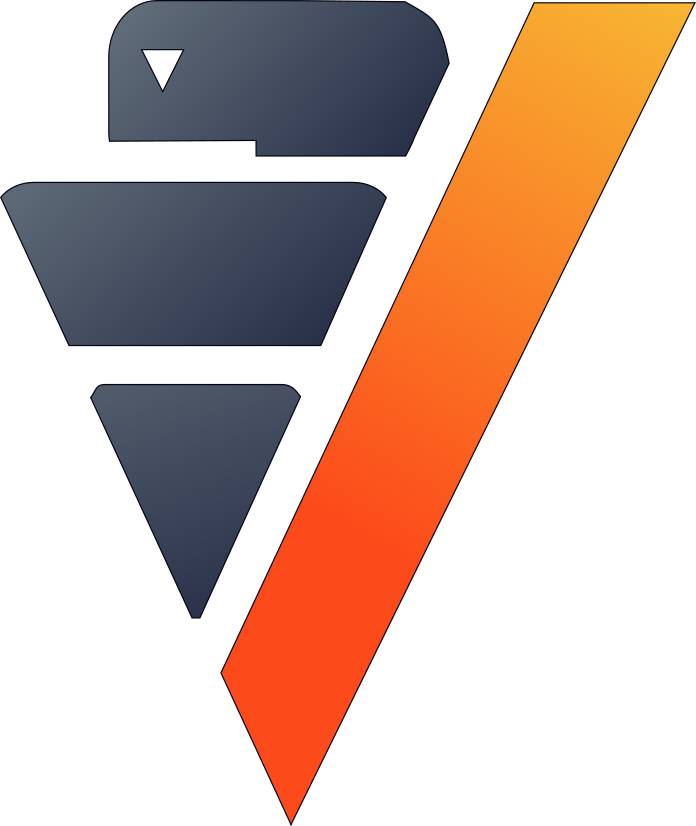

In [32]:
africa = africa.select(predictors[0:23] + ["zralocp", "zmalocp"])
model_africa_rf_zralocp.predict(africa, name = "pred_zralocp")
model_africa_rf_zmalocp.predict(africa, name = "pred_zmalocp")

Let's visualize our model. We begin by creating a bubble plot using the two scores. 

In [33]:
africa.scatter(
    columns = ["zralocp", "zmalocp"],
    size = "zpses",
    by = "PENGLISH",
    max_nb_points = 2000,
)

Notable influences are home language and the socioeconomic status. It seems like students that both speak Engish at home often (but not all the time) and have a comfortable standard of living tend to perform the best.

Now, let's see how a student's nationality might affect their performance.

In [34]:
africa["country_long"].bar(
    method = "90%", 
    of = "pred_zmalocp",
    max_cardinality = 50,
    width = 800,
)

In [35]:
africa["country_long"].bar(
    method = "10%", 
    of = "pred_zmalocp",
    max_cardinality = 50,
    width = 800,
)

The students' nationalities seem to have big impact. For example, Swaziland, Kenya, and Tanzanie are probably overrating the bad students (90% of the scores are greater than the average (500)) whereas some countries like Zambia, South Africa, and Malawi are underrating their students (90% of the scores are under 480). This could be related to the global education in the country: some education systems could be harder than the others. Let's break this down by region.

In [37]:
africa["district"].bar(
    method = "50%", 
    of = "pred_zmalocp",
    max_cardinality = 50,
    width = 1000,
)

The same applies to the regions. Let's look at student age.

In [38]:
africa["PAGE"].bar(
    method = "50%", 
    of = "pred_zmalocp",
    max_cardinality = 50,
    width = 1000,
)

Let's look at the the variables 'PLIGHT' (a student's main lighting source) and 'PREPEAT' (repeated years).

In [39]:
africa.bar(
    columns = ["PREPEAT", "PLIGHT"],
    method = "avg", 
    of = "pred_zmalocp",
    width = 850,
)

We can see that students who never repeated a year and have light at home tend to do better in school than those who don't.

Another factor in a student's performance might be their method of transportation, so we'll look at the "ptravel2" variable.

In [40]:
africa["ptravel2"].bar(
    method = "50%", 
    of = "pred_zmalocp",
    width = 850,
)

We can clearly see that the more inconvenient it is to get to school, the worse students tend to perform.

Let's look at the influence of the 'district'.

Predictably, better teachers generally lead to better results. Let's look at the influence of the 'district'.

In [41]:
africa["district"].bar(
    method = "50%",
    of = "pred_zmalocp",
    h = 100,
)

Here, we can see that Chicualacuala has a very high median score, so we can conclude that a students' district might impact their performance in school.

After assessing several predictors of student-performance, we can hypothesize some solutions. For example, we might suggest in investing in extracurricular activities, ensuring that students have adequate light sources at home, or improving public transportation.

## Machine Learning: Finding the Best Students


To find the best students we can use each school's ID (the SCHOOL variable) and compute the average score. We can then order these by descending average score and note the top five students at each school.

In [ ]:
africa = load_africa_education()

# Computing the averaged score
africa["score"] = (africa["zralocp"] + africa["zmalocp"]) / 2 

# Computing the averaged student score
africa.analytic(
    func = "row_number",
    by = ["schoolname"],
    order_by = {"score": "desc"},
    name = "student_class_position",
)

# Finding the 3 best students by class
africa.case_when(
    "best",
    africa["student_class_position"] <= 5, 1,
    0,
)

# Selecting the main variables
africa = africa[
    [
        "PENGLISH", 
        "PAGE", 
        "zpses", 
        "PREPEAT",
        "PTRAVEL2", 
        "PLIGHT",
        "SLOCAT",
        "best",
        "zpmealsc",
        "PFATHER",
        "SPUPPR04",
        "PNURSERY",
    ]
]

# Getting the categories dummies for the Logistic Regression
africa.one_hot_encode(
    columns = [
        "PLIGHT", 
        "PTRAVEL2",
        "PREPEAT",
        "PENGLISH",
        "SLOCAT",
        "PFATHER",
        "SPUPPR04",
        "PNURSERY",
        "zpmealsc",
    ],
    max_cardinality = 1000,
)
africa.dropna()

Nothing was filtered.


Let's create a logistic regression to understand what circumstances allowed these students to perform as well as they have.

In [ ]:
from verticapy.machine_learning.vertica import LogisticRegression

response = "best"
predictors = africa.get_columns(
    exclude_columns = [
        "PLIGHT", 
        "PTRAVEL2",
        "PREPEAT",
        "PENGLISH",
        "SLOCAT",
        "PFATHER",
        "SPUPPR04",
        "PNURSERY",
        "zpmealsc",
        "best",
    ],
)
model_africa_logit_best = LogisticRegression(
    name="africa_logit_best", 
    solver="BFGS"
)
model_africa_logit_best.drop()
model_africa_logit_best.fit(
    africa,
    predictors, 
    response,
)
model_africa_logit_best.features_importance()

We can see that the best students tend to be young, speak English at home, come from a good socioeconomic background, have a father with a degree, and live relatively close to school.

## Conclusion

We've solved our problem in a Pandas-like way, all without ever loading data into memory!